# **CA06: Customer Segmentation Using K-Means Clustering**

**Objective:** The aim of this assignment is to perform customer segmentation
using the K-Means clustering algorithm in order to better understand the
different types of customers in a given dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
# URL of the CSV file
url = "https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Data Cleaning and Preparation:**

In [4]:
#Using describe to understand the spread of the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#Using shape to get see the size of the dataset
df.shape

(200, 5)

In [6]:
#Using dtypes to look at the data type of each column
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
#Checking for missing values in the dataset
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Create histograms for each variable
for col in ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(8, 6))
    if col == 'Genre':
        sns.histplot(data=df, x=col, bins=2, kde=False, palette='pastel', alpha=0.8)
    else:
        sns.histplot(data=df, x=col, bins=10, kde=False, palette='pastel', alpha=0.8)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Create boxplots for each variable
for col in ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(8, 6))
    if col == 'Genre':
        sns.boxplot(data=df, x=col, y='Age', palette='pastel', hue_order=['Male', 'Female'])
    else:
        sns.boxplot(data=df, x=col, palette='pastel')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

**Preparing the data for clustering:**

In [10]:
#Scales the 'Annual Income (k$)' and 'Spending Score (1-100)' columns of a DataFrame named customers 
#using StandardScaler, and creates a new DataFrame scaled_df with the scaled values.
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
scaled_df = pd.DataFrame(scaled_df, columns=['Annual Income', 'Spending Score'])
scaled_df.head()

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


**K-Means Clustering:**

In [11]:
#Creates a new DataFrame X by selecting the 'Annual Income' and 'Spending Score' 
#columns from the previously scaled DataFrame scaled_df.
X = scaled_df[['Annual Income', 'Spending Score']]

In [14]:
# Using the silhouette method to identify the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    # Fit a KMeans model for each number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Compute the average Silhouette score for each model
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print("Silhouette Scores: " ,score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scores:  0.3146990432802128
Silhouette Scores:  0.46658474419000145


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scores:  0.4939069237513199


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scores:  0.5546571631111091


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scores:  0.5398800926790663


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scores:  0.5263454490712252


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scores:  0.4558438123118706


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scores:  0.45532159949822093
Silhouette Scores:  0.4476280825932578


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
#Printing the opitmal ammount of clusters 
k_num = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {k_num}")

Optimal number of clusters: 5


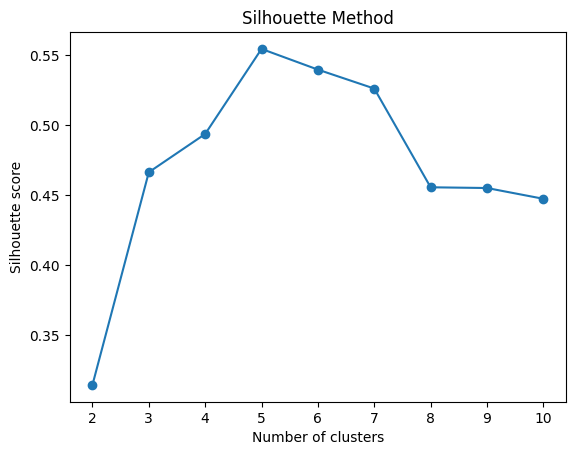

In [15]:
#Determining the optimal number of clusters using the silhouette score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

In [24]:
#Initializing and fiting a KMeans clustering model with a specified 
#number of clusters (k_num), a random state of 101, and 10 initializations, 
#using a DataFrame X as input data.
kmeans = KMeans(n_clusters=k_num, random_state=101, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=101)

**Visualizing and Analyzing the Clusters**

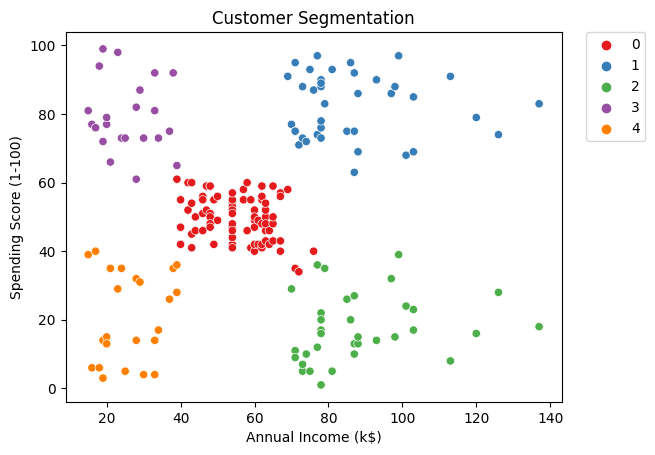

In [35]:
#Assigning cluster assignments for each data point and visualizing the clusters
clusters = kmeans.predict(X)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters, palette='Set1')
plt.title('Customer Segmentation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [42]:
# Interpret the clusters and provide a brief description of each cluster
cluster_descriptions = df.groupby(clusters)[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

for cluster in cluster_descriptions.index:
    cluster_mean_income = cluster_descriptions.loc[cluster, 'Annual Income (k$)']
    cluster_mean_spending = cluster_descriptions.loc[cluster, 'Spending Score (1-100)']
    print(f'Cluster {cluster}: Mean Annual Income = ${cluster_mean_income:.2f}, Mean Spending Score = {cluster_mean_spending:.2f}')


Cluster 0: Mean Annual Income = $55.30, Mean Spending Score = 49.52
Cluster 1: Mean Annual Income = $86.54, Mean Spending Score = 82.13
Cluster 2: Mean Annual Income = $88.20, Mean Spending Score = 17.11
Cluster 3: Mean Annual Income = $25.73, Mean Spending Score = 79.36
Cluster 4: Mean Annual Income = $26.30, Mean Spending Score = 20.91


**Cluster 0:** Customers in this cluster have a relatively lower annual income ($55.30) and moderate spending score (49.52).

**Cluster 1:** Customers in this cluster have a higher annual income ($86.54) and high spending score (82.13), indicating they are potential high-value customers.

**Cluster 2:** Customers in this cluster have a higher annual income ($88.20) but a very low spending score (17.11), indicating they may be more conservative in their spending habits.

**Cluster 3:** Customers in this cluster have a lower annual income ($25.73) but a high spending score (79.36), indicating they may be impulse buyers or have a preference for luxury items despite their lower income.

**Cluster 4:** Customers in this cluster have a very low annual income ($26.30) and a low spending score (20.91), indicating they may have limited purchasing power or prioritize savings over spending.

**Findings Summarized:**

**a. Dataset Description:**
The dataset used for this analysis is called "Mall_Customers.csv". It contains information about customers' demographics and spending behavior in a shopping mall. The dataset has the following attributes:

- CustomerID: An integer representing the unique ID of each customer
- Genre: A categorical variable indicating the gender of the customer (either "Male" or "Female")
- Age: An integer representing the age of the customer
- Annual Income (k$): A numerical variable representing the annual income of the customer in thousands of dollars
- Spending Score (1-100): A numerical variable representing the spending score of the customer, ranging from 1 to 100, where a higher score indicates higher spending behavior.


**b. Data Preprocessing, Feature Selection, and Scaling:**
The following steps were taken for data preprocessing, feature selection, and scaling:

- The dataset was loaded into a pandas DataFrame from the provided URL.
Descriptive statistics, such as mean, standard deviation, and quartiles, were calculated using the describe() function to understand the spread of the data.
- The shape of the dataset was checked using the shape attribute to determine the size of the dataset, which is the number of rows and columns.
- The data types of each column were checked using the dtypes attribute to understand the data type of each attribute.
- Missing values were checked using the isnull().sum() function to ensure that the dataset does not contain any missing values.
- Histograms were created for each variable using the histplot() function from the Seaborn library to visualize the distribution of data.
- Boxplots were created for each variable using the boxplot() function from the Seaborn library to identify any potential outliers.
- The 'Annual Income (k$)' and 'Spending Score (1-100)' columns were selected from the DataFrame and scaled using the StandardScaler from the Scikit-learn library to normalize the data and bring it to a common scale. The scaled data was then stored in a new DataFrame named 'scaled_df'.


**c. Determining the Optimal Number of Clusters:**
The optimal number of clusters was determined using the silhouette method, which measures the similarity of data points within clusters and dissimilarity between clusters. The silhouette score was computed for different numbers of clusters ranging from 2 to 10. The highest silhouette score was considered as the optimal number of clusters. The silhouette scores for each number of clusters were printed, and a line plot was created to visualize the silhouette scores for different numbers of clusters.


**d. Cluster Description:**
A KMeans clustering model was fitted with the optimal number of clusters determined in the previous step. The cluster assignments for each data point were predicted using the 'predict()' method of the KMeans model. The clusters were visualized on a scatterplot, where the x-axis represented the 'Annual Income (k$)' and the y-axis represented the 'Spending Score (1-100)'. Cluster descriptions were calculated by taking the mean of the 'Annual Income' and 'Spending Score (1-100)' variables for each cluster. The cluster descriptions were printed to provide insights into the characteristics of each cluster.



**e. Insights and Recommendations:**
Based on the analysis, the following insights and recommendations can be made:
- The dataset does not contain any missing values and is ready for further analysis.
- The 'Annual Income (k$)' and 'Spending Score (1-100)' variables are the most relevant variables for customer segmentation as they provide information about customers' spending behavior.
The optimal number of clusters was determined to be 5 using the silhouette method, indicating that the customers can be grouped into 5 distinct clusters based on their spending behavior.